In [158]:
# The code can be used for developing Plots for comparing binding and non-binding conformations by changing the excel sheet that it reads
# The following code is an example
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as xl
import shutil
import os
from scipy.stats import mannwhitneyu

In [159]:
# Reading the excel file
df = pd.read_excel('/Users/vinipatel/Desktop/lab2/CDR3_loops/Results/HF_dist/CDR3_HF_dist/compilation_4A/CDR3b_4A_HF_Interactions_Compiled.xlsx')

In [160]:
# Selecting data based on the categories
structures_with_binding = df.loc[df ['Binding'] == 1]
structures_without_binding = df.loc[df['Binding'] == 0]

In [161]:
# Calculate the p-value
statistic, p_value = mannwhitneyu(structures_with_binding['Count_HF'], structures_without_binding['Count_HF'])
print(p_value)

0.549330874927836


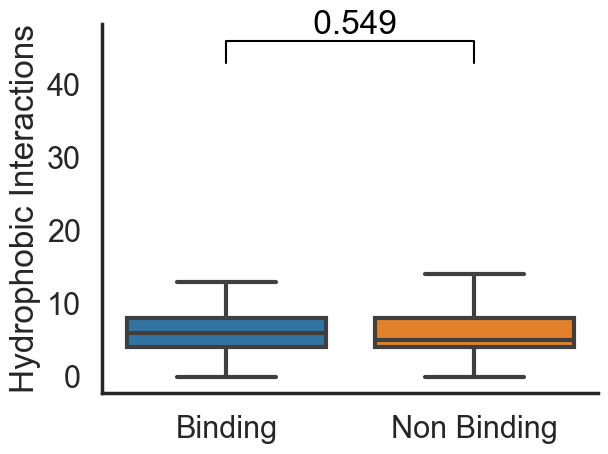

In [162]:
# Generate the plot 
# Read the excel file
df = pd.read_excel('/Users/vinipatel/Desktop/lab2/CDR3_loops/Results/HF_dist/CDR3_HF_dist/compilation_4A/CDR3b_4A_HF_Interactions_Compiled.xlsx')
sns.set_style("white")
sns.set_context("poster")
# Generate the box plot
axes = sns.boxplot(data=df, x='Binding', y='Count_HF',fliersize=0, zorder=5)
# Generate the significant bars
y, h, col = df['Count_HF'].max() + 2, 3, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f' {p_value:.3f}', ha='center', va='bottom', color=col)
# Set plot labels
axes.set_xticklabels(['Binding', 'Non Binding'])
axes.set(xlabel='', ylabel='Hydrophobic Interactions')
sns.despine()
# Save the plot
plt.savefig("/Users/vinipatel/Desktop/lab2/CDR3_loops/Results/HF_dist/CDR3_HF_dist/compilation_4A/CDR3a+b_inter_4A_HF", bbox_inches='tight')